In [23]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import streamlit as st
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Visualisation
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import itertools
plt.style.use('fivethirtyeight')
import seaborn as sns
import plotly.graph_objects as go
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.offline as py
py.init_notebook_mode(connected=True)


#Model
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor
import random



In [2]:
#Loading the dataset
df = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# statistics of the data

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.shape
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [18]:
print(f"the missing values for glucose are : ",len(df.loc[df.Glucose==0]))
print(f"the missing values for insulin are : ",len(df.loc[df.Insulin==0]))
print(f"the missing values for bloodpressure are : ",len(df.loc[df.BloodPressure==0]))
print(f"the missing values for SkinThickness are : ",len(df.loc[df.SkinThickness==0]))
print(f"the missing values for BMI are : ",len(df.loc[df.BMI==0]))

the missing values for glucose are :  5
the missing values for insulin are :  374
the missing values for bloodpressure are :  35
the missing values for SkinThickness are :  227
the missing values for BMI are :  11


In [27]:
# Define missing plot to detect all missing values in dataset
def missing_plot(df, key) :
    null_feat = pd.DataFrame(len(df[key]) - df.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(df[key]) - (len(df[key]) - df.isnull().sum()))/len(df[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
   
# Plotting 
missing_plot(df, 'Outcome')

# EXPLORATORY DATA ANALYSIS

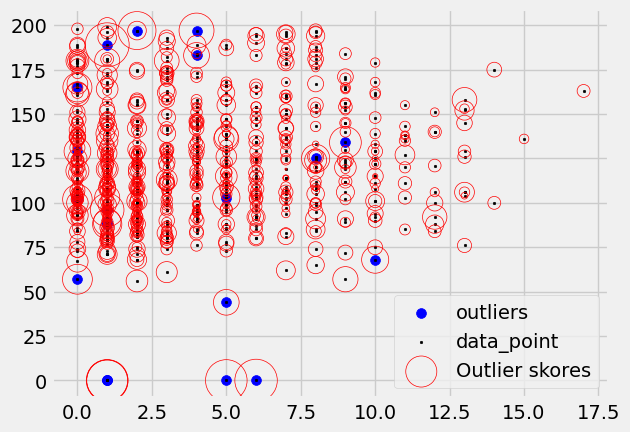

In [5]:
# OUTLIER DETECTION

x = df.drop(['Outcome'],axis=1)
y = df.Outcome
columns = x.columns.tolist()
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)

x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score['score'] = x_score

threshold_outliers = -1.5
filtre = outlier_score['score'] < threshold_outliers
outlier_index = outlier_score[filtre].index.tolist()

plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1],color = 'blue',s=50,label='outliers')
plt.scatter(x.iloc[:,0]
            ,x.iloc[:,1],color='k',s=3,label='data_point')
radius = (x_score.max() - x_score ) / (x_score.max() - x_score.min() )
outlier_score['radius '] = radius

plt.scatter(x.iloc[:,0], x.iloc[:,1], s=1000*radius, edgecolors='r',facecolor='none',label='Outlier skores')
plt.legend()
plt.show();


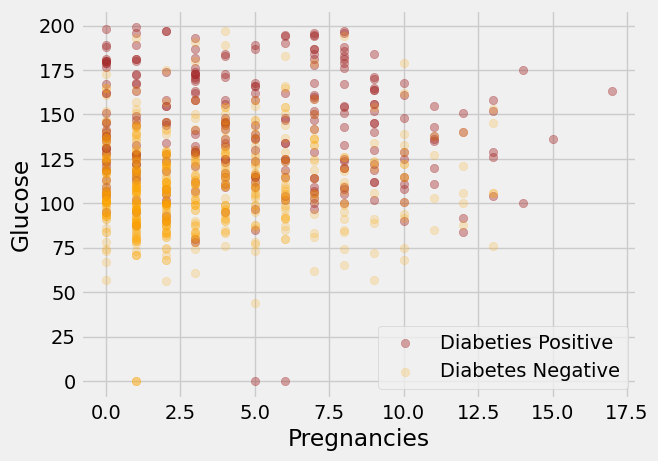

In [6]:
#Split Data as M&B
p = df[df.Outcome == 1]
n = df[df.Outcome == 0]


plt.scatter(p.Pregnancies,p.Glucose,color = "brown",label="Diabeties Positive",alpha=0.4)
plt.scatter(n.Pregnancies,n.Glucose,color = "Orange",label="Diabetes Negative",alpha=0.2)
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.legend()
plt.show()

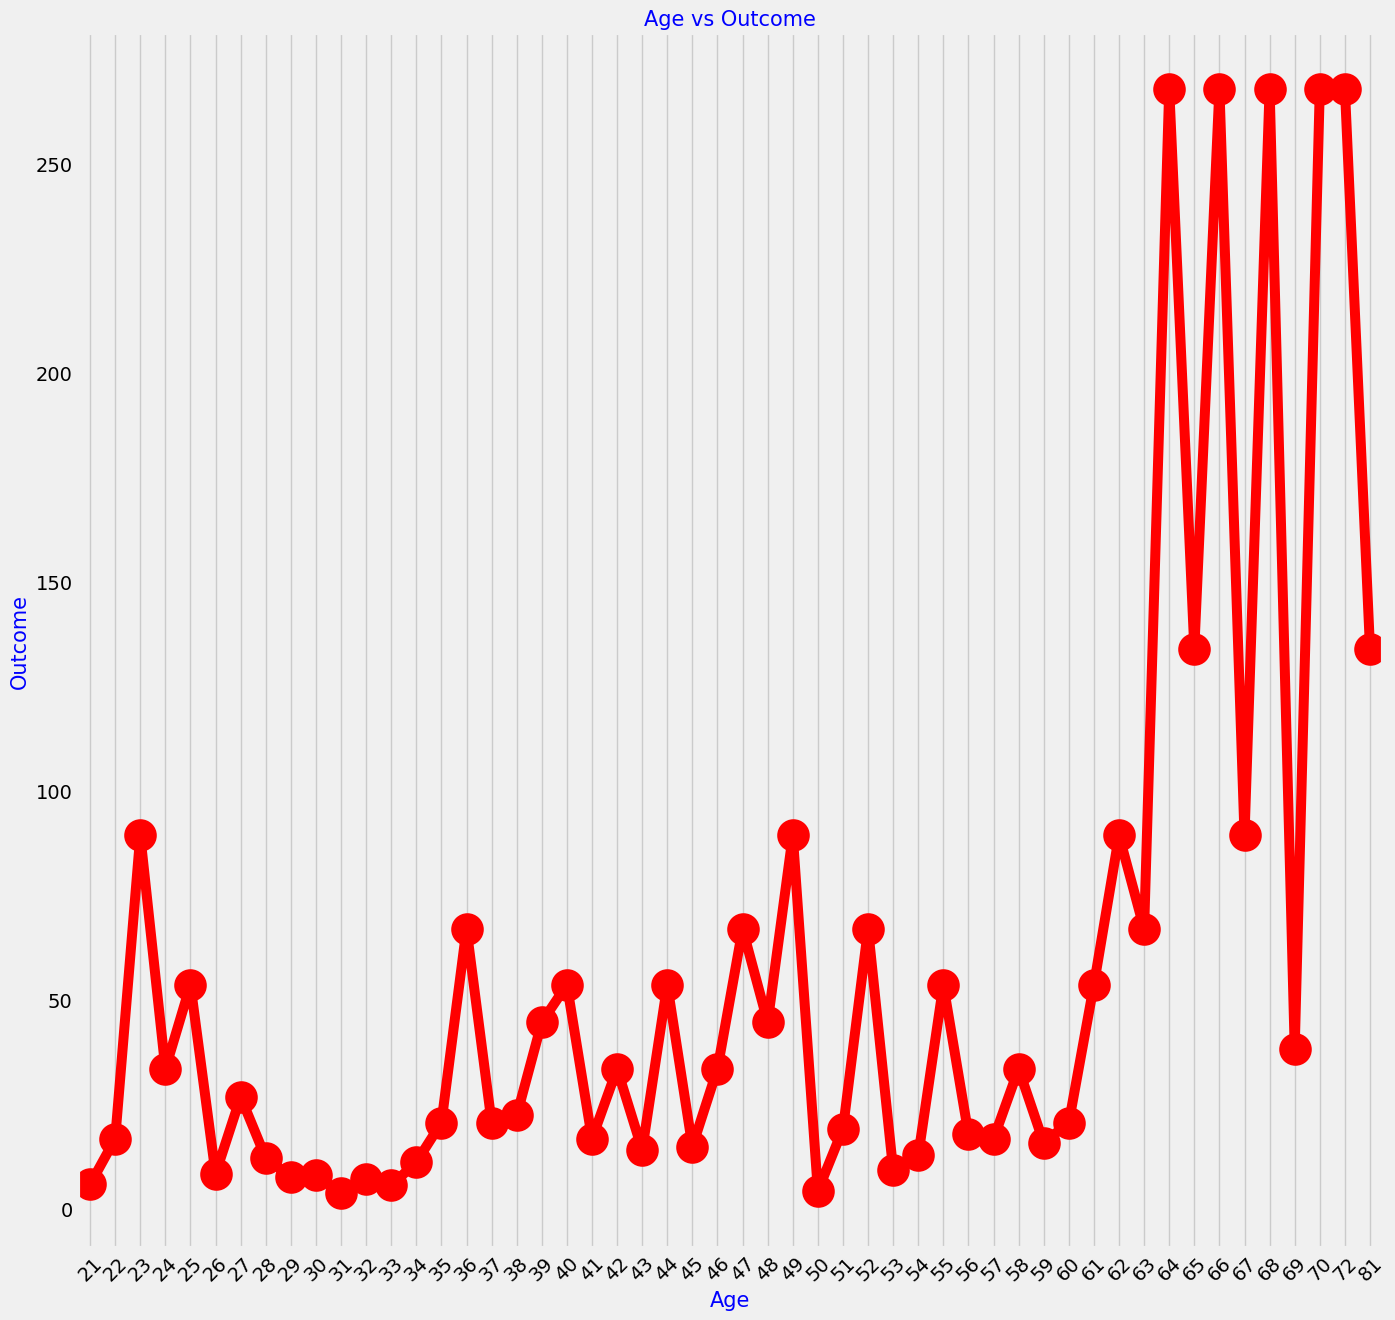

In [7]:
Age= df['Age']
age_unique=df['Age'].unique()
age_outcome_values=df.groupby('Age')['Outcome'].count().values
mean_Outcome=[]
for i,age in enumerate(age_unique):
    mean_Outcome.append(sum(df[df['Age']==Age].Outcome)/age_outcome_values[i])

plt.figure(figsize=(15,15))
sns.pointplot(x=age_unique,y=mean_Outcome,color='red')
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Outcome',fontsize = 15,color='blue')
plt.title('Age vs Outcome',fontsize = 15,color='blue')
plt.grid()
plt.show()



In [8]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor


# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [9]:
#Identifying the Variables

X = df.drop('Outcome', axis=1)
X

y= df['Outcome']
y


from sklearn.model_selection import train_test_split
#Splitting the Dataset
X_train , X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

#Sizes of the Set
print('The Training Set:', (X_train.shape, y_train.shape))
print('The Test Set:', (X_test.shape, y_test.shape))


The Training Set: ((537, 8), (537,))
The Test Set: ((231, 8), (231,))


In [10]:
# Building, Predicting, and Evaluating the Neural Network Model

from sklearn.neural_network import MLPClassifier
#To train the data
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

#Use the trained model to generate predictions on training set and test set.
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[325  31]
 [120  61]]
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       356
           1       0.66      0.34      0.45       181

    accuracy                           0.72       537
   macro avg       0.70      0.62      0.63       537
weighted avg       0.71      0.72      0.69       537



#DEEP LEARNING

In [12]:
#Import Libraries for Deep Learning

from tensorflow.keras import backend as K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential



In [13]:
def buildclassifier():
    classifier = Sequential() #initialize NN
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu', input_dim =X_train.shape[1]))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
    return classifier


In [14]:
classifier = KerasClassifier(build_fn = buildclassifier, epochs = 500)
accuracies = cross_val_score(estimator = classifier, X = X_train, y= y_train, cv = 5)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))



Epoch 1/500
14/14 [==============================] - 6s 11ms/step - loss: 0.6921 - accuracy: 0.6387
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6892 - accuracy: 0.6620
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6848 - accuracy: 0.6620
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6746 - accuracy: 0.6620
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6629 - accuracy: 0.6620
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6612 - accuracy: 0.6620
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6564 - accuracy: 0.6620
Epoch 8/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6543 - accuracy: 0.6620
Epoch 9/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6523 - accuracy: 0.6620
Epoch 10/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6479 - accuracy: 0.6620
Epoch 11

In [32]:
#first layer
model.add(Dense(units=8,activation='relu',kernel_initializer='zeros',bias_initializer='zeros',input_dim=8))
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_36 (Dense)            (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_37 (Dense)            (None, 2)                 18        
                                                                 
 dense_38 (Dense)            (None, 8)                 24        
                                                                 
 dense_39 (Dense)            (None, 8)                

In [15]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

new_df_shfl = shuffle(df, random_state=443)
X = df.drop('Outcome', axis=1)
y= df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=80)

In [16]:
num_epochs = 5000
log_inteval = 250
total_losses = []
total_val_losses = []
lr = 1e-4
lr_decay_inteval = 2500
lr_decay_rate = 0.3